Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the ct_byks, fsq and ylp data frame one by one and (data cleaning)

In [40]:
ct_bks_df = pd.read_csv(f'/Users/kamininayyar/Github_old_pc/GitHub_frm_old_pc/BostonDF.csv')
ct_bks_df.head(2)

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,1,"{'ebikes': 0, 'has_ebikes': True, 'last_update...",18,553ed0300d38108b4f21a6bafa3db70c,42.386781,-71.006098,Orient Heights T Stop - Bennington St at Sarat...,2023-01-04T20:51:05.211000Z
1,20,"{'ebikes': 0, 'has_ebikes': True, 'last_update...",12,93542dcbf21f5411569adb92cd7cc199,42.368844,-71.039778,Maverick Square - Lewis Mall,2023-01-04T20:51:05.213000Z


In [41]:
ctbk_df=ct_bks_df.drop([ 'id', 'extra', 'latitude','longitude','timestamp'], axis=1)
ctbk_df.head(2)

,empty_slots,free_bikes,name
0,1,18,Orient Heights T Stop - Bennington St at Sarat...
1,20,12,Maverick Square - Lewis Mall


In [29]:
boston_fsq = pd.read_csv(f'/Users/kamininayyar/Github_old_pc/GitHub_frm_old_pc/boston_entrtanmnt_fsq.csv')
boston_fsq.head(1)

,lat-long,cat_id,category_name,name,rating,distance,latitude,longitude,address,popularity,open_now
0,0 42.386781\n1 42.368844\n2 42....,16032,Park,Harbour Square Park,9.3,983,43.639288,-79.378261,NaN,0.99542,False


In [37]:
fsq_df=boston_fsq.drop([ 'cat_id', 'category_name', 'latitude','longitude','address','open_now'], axis=1)
fsq_df.head(2)

,lat-long,name,rating,distance,popularity
0,0 42.386781\n1 42.368844\n2 42....,Harbour Square Park,9.3,983,0.995420
1,0 42.386781\n1 42.368844\n2 42....,Fleck Dance Theater,8.3,1007,0.934638


In [30]:
boston_ylp = pd.read_csv(f'/Users/kamininayyar/Github_old_pc/GitHub_frm_old_pc/boston_ylp_df.csv')
boston_ylp.head(1)

,lat-long,category_name,name,distance,latitude,longitude,address,is_closed,rating,rating_count
0,0 42.386781\n1 42.368844\n2 42....,tapas,Toro,488.960833,42.336988,-71.075924,"['1704 Washington St', 'Boston, MA 02118']",False,4.0,2425


In [38]:
ylp_df=boston_ylp.drop([ 'category_name', 'latitude','longitude','address','is_closed','rating_count'], axis=1)
ylp_df.head(2)

,lat-long,name,distance,rating
0,0 42.386781\n1 42.368844\n2 42....,Toro,488.960833,4.0
1,0 42.386781\n1 42.368844\n2 42....,The Friendly Toast,833.597293,4.5


# merging the fsq and ylp with cty byks one by one and then merging them together into one dataframe

In [55]:
fsq_ctbk_df = pd.merge(ctbk_df,fsq_df, how='outer')
fsq_ctbk_df.tail(5)

,empty_slots,free_bikes,name,lat-long,rating,distance,popularity
431,NaN,NaN,Starbucks,0 42.386781\n1 42.368844\n2 42....,6.9,1226.0,0.976767
432,NaN,NaN,Redpath Stage at Harbourfront,0 42.386781\n1 42.368844\n2 42....,6.9,1212.0,0.875322
433,NaN,NaN,E11Even,0 42.386781\n1 42.368844\n2 42....,7.6,1412.0,0.983906
434,NaN,NaN,Toronto Railway Heritage Centre,0 42.386781\n1 42.368844\n2 42....,8.0,1496.0,0.991425
435,NaN,NaN,Island Cafe,0 42.386781\n1 42.368844\n2 42....,7.0,1253.0,0.941678


In [54]:
ylp_ctbk_df = pd.merge(ctbk_df,ylp_df, how='outer')
ylp_ctbk_df.tail(5)

,empty_slots,free_bikes,name,lat-long,distance,rating
431,NaN,NaN,Franklin Cafe,0 42.386781\n1 42.368844\n2 42....,680.877986,4.0
432,NaN,NaN,The Elephant Walk,0 42.386781\n1 42.368844\n2 42....,515.599188,4.5
433,NaN,NaN,Oishii Boston,0 42.386781\n1 42.368844\n2 42....,885.452866,4.0
434,NaN,NaN,The Butcher Shop,0 42.386781\n1 42.368844\n2 42....,518.988566,4.0
435,NaN,NaN,Mana Escondido Café,0 42.386781\n1 42.368844\n2 42....,91.861892,4.5


In [57]:
fsq_ylp_ctbyk = pd.merge(ylp_ctbk_df,fsq_ctbk_df, how='outer')
fsq_ylp_ctbyk.tail(5)

,empty_slots,free_bikes,name,lat-long,distance,rating,popularity
481,NaN,NaN,Starbucks,0 42.386781\n1 42.368844\n2 42....,1226.0,6.9,0.976767
482,NaN,NaN,Redpath Stage at Harbourfront,0 42.386781\n1 42.368844\n2 42....,1212.0,6.9,0.875322
483,NaN,NaN,E11Even,0 42.386781\n1 42.368844\n2 42....,1412.0,7.6,0.983906
484,NaN,NaN,Toronto Railway Heritage Centre,0 42.386781\n1 42.368844\n2 42....,1496.0,8.0,0.991425
485,NaN,NaN,Island Cafe,0 42.386781\n1 42.368844\n2 42....,1253.0,7.0,0.941678


In [65]:
fsq_ylp_ctbyk.to_csv(f'/Users/kamininayyar/Github_old_pc/GitHub_frm_old_pc/fsq_ylp_ctbyk.csv', index = False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [61]:
fsq_ylp_ctbyk.nunique()

empty_slots     26
free_bikes      28
name           485
lat-long         1
distance        99
rating          23
popularity      50
dtype: int64

In [62]:
fsq_ylp_ctbyk.isnull().sum()

empty_slots    100
free_bikes     100
name             0
lat-long       386
distance       386
rating         386
popularity     436
dtype: int64

In [58]:
fsq_ylp_ctbyk.describe()

,empty_slots,free_bikes,distance,rating,popularity
count,386.000000,386.000000,100.000000,100.000000,50.000000
mean,8.463731,8.476684,924.336594,5.950000,0.945324
std,5.489540,5.241267,366.165690,1.948556,0.125819
min,0.000000,0.000000,91.861892,3.500000,0.122031
25%,4.000000,4.250000,618.841296,4.000000,0.942355
50%,8.000000,8.000000,997.000000,5.400000,0.976820
75%,12.000000,12.000000,1209.750000,7.825000,0.991058
max,39.000000,34.000000,1496.000000,9.300000,0.999851


<AxesSubplot:xlabel='rating', ylabel='Count'>

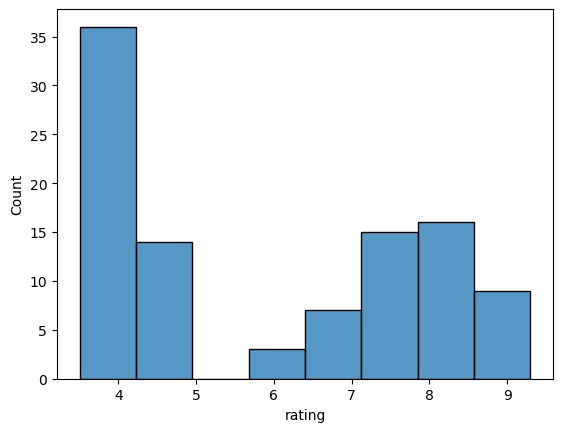

In [59]:
sns.histplot(fsq_ylp_ctbyk['rating'])

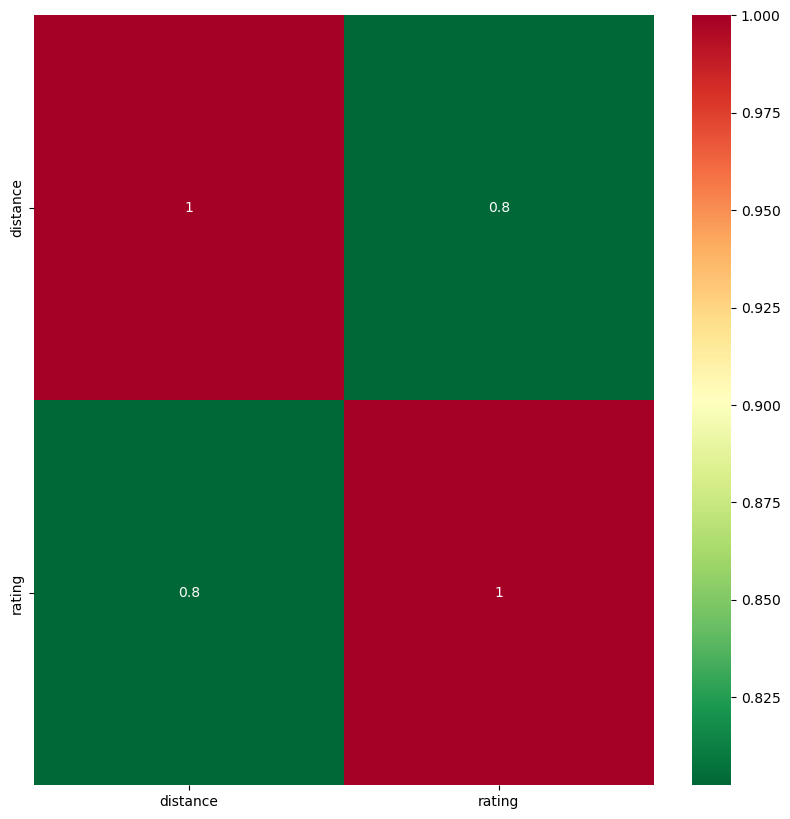

In [63]:
cormat = fsq_ylp_ctbyk.corr()
top_corr_features = cormat.index[abs(cormat["rating"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(fsq_ylp_ctbyk[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

<AxesSubplot:xlabel='rating', ylabel='rating'>

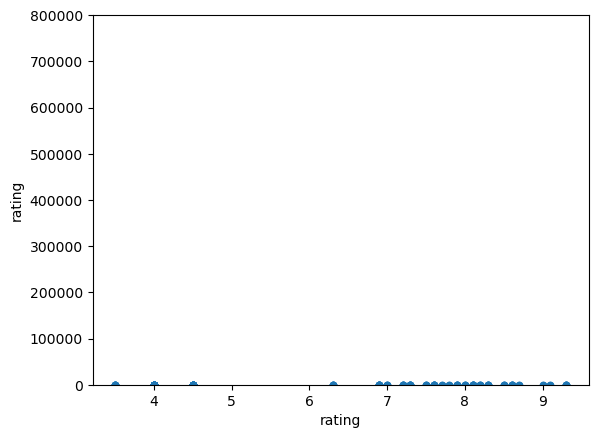

In [64]:
var="rating"
data=fsq_ylp_ctbyk[['rating',var]]
data.plot.scatter(x=var, y='rating', ylim=(0,800000))

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
connection = create_connection("fsq_ylp.sqlite")

In [ ]:
# to define the function
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"the error '{e}' occured")
        

In [ ]:
# query for the table
create_rating_table = """
CREATE TABLE IF NOT EXISTS rating(
        id VARCHAR(100) PRIMARY KEY AUTOINCREMENT,
        name VARCHAR(25) NOT NULL,
        distance DECIMAL,
        rating DECIMAL);"""

In [ ]:
execute_query(connection, create_rating_table)

In [ ]:
create_popularity_table = """
CREATE TABLE IF NOT EXISTs popularity(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        distance DECIMAL,
        popularity float,
        FOREIGN KEY (distance) REFERENCES rating(distance));"""

In [ ]:
execute_query(connection, create_popularity_table)